# Numpy.Random - A journey

## The Purpose of the Package

### Uses for Pseudorandom Number Generators

Random numbers are used for a variety of purposes. Some examples include:

Games: Generate a different level each time the user returns to a game. Or with seeds you could ensure enemys came from the same place for that level

Creative Coding: Generating random arrangement of shapes and colours. If you wanted to make adjustments you would use it without the seeds.

Dummy Data: Creating dummy data for testing ideas.

Simulations: Monte Carlo Simula
tions.

## Simple Random Data and Permutations

### Simple Random Data

#### 1. rand

This creates random numbers in a uniform distribution, meaning that the values are completely random in that the probability of a number being selected is equal across all numbers in the range. You can also specify the shape of the numbers in multiple dimensions. Entering one arguement will create a line. All numbers generate will be between 0 and 1.

[0.9014441  0.08830649 0.25757408 0.63748395 0.92871694 0.9688725
 0.63031899 0.71757505 0.11232234 0.77247598]


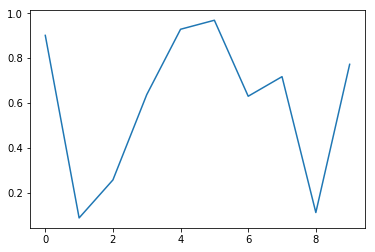

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

list = np.random.rand(10)
print(list)
plt.plot(list)
plt.show()
    

It can also be used to create a random number

In [2]:
np.random.rand()

0.6181338940792868

#### randn

This function produces random number is a normal distribution as a opposed to a uniform distribution. It can take either an integer or shape as it's input. A normal distribution results in a "bell curve" when charted. This mean that higher percentate of the floats produced by the function will be clustered around the mean. 68.26% will be one standard deviation above or below the mean. 95.44% will be two standard deviation away from the mean. 99.72% will be 3 standard deviations away from the mean. 

When using *randn* the distribution produced will always have a mean of 0 and variance of 1

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


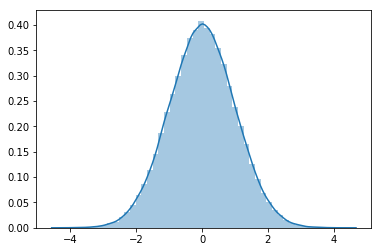

In [3]:
randnarray = np.random.randn(100000,1)

sns.distplot(randnarray)

#### randint

This function produces random integers in the range that is inputted. You can also specify the amount of numbers to be produced. If no "size" is specified the function will just produce one result. The upper range must always be one higher than the highest number you want to select from. For example, if 10 is the highest number you want, then you must enter 11 in the function parameters.

In [4]:
# Picking a number between 1 and 10
np.random.randint(0, 11)

7

In [5]:
# Pick a number between -1 and -10
np.random.randint(-10, 0)

-3

In [6]:
# 10 random numbers from between 100 and 200.
np.random.randint(100, 201)

162

It is also possible to produce different shapes by entering a tuple as the "size" parameter. 

In [7]:
np.random.randint(11, size=(3,2,5))

array([[[ 7,  0,  6,  3,  1],
        [ 1,  6,  7,  1,  3]],

       [[ 1,  8,  6,  8,  7],
        [ 1,  1,  4,  0,  4]],

       [[ 2,  4,  6,  3, 10],
        [ 0, 10,  3, 10,  6]]])

Finally, you can also specify the data type (dtype). 

In [8]:
np.random.randint(1, dtype="int")

0

Floats and complex numbers are not supported, boolean outputs are as long as you limit the "high" value to 2.

In [9]:
np.random.randint(2, dtype="bool")

True

#### Use: Random phone number generator or dice rolls

#### random_integers

This is a deprecated function that has been replaced by *randint* which is discussed above.

#### random_sample, random, ranf, sample

These four functions all return a random float or array of floats depending on the parameters used. 

In [10]:
# single random float
np.random.random_sample()

0.48196345619543246

In [11]:
# array of floats
np.random.random((5,2))

array([[0.26580192, 0.84200818],
       [0.30011717, 0.10737238],
       [0.64146619, 0.5290307 ],
       [0.57373962, 0.78646062],
       [0.42872205, 0.67280061]])

#### choice

This function selects random options from a given one dimensional array. The options can be ints, floats, or an array like object such a list or tuple.

For example, you could use this to randomly select a city in Ireland.

In [12]:
# Where will I go for the long weekend?

cities = ["Limerick", "Galway", "Cork", "Dublin", "Waterford", "Kilkenny"]
print("You're going to " + np.random.choice(cities) + "!!!!")

You're going to Cork!!!!


As with all the previous random functions, you can also specify the shape of the data you want to select. You can also choose to prevent the same result being returned twice using the "replacement" parameter.

In [13]:
# Randomly rank the cities in two tiers - without using replacement you can end up with the same city in both tiers.

np.random.choice(cities, size=(2,3))

array([['Galway', 'Waterford', 'Limerick'],
       ['Waterford', 'Waterford', 'Waterford']], dtype='<U9')

In [14]:
# Randomly rank the cities in two tiers - with replacement = false you will get two sets of unique values

np.random.choice(cities, size=(2,3), replace=False)

array([['Kilkenny', 'Dublin', 'Waterford'],
       ['Limerick', 'Cork', 'Galway']], dtype='<U9')

Finally, you can also weight the probability of a certain option being selected. The sum of the probabilites must be 1.

In [15]:
# What is the best city in Ireland? 
print("Our totally unbiased computer has selected " + np.random.choice(cities, p=[0.95, 0.01, 0.01, 0.01, 0.01, 0.01])
          + " as the best city in Ireland.")

Our totally unbiased computer has selected Limerick as the best city in Ireland.


#### bytes

This function generates a string of bytes of a specified length.

In [16]:
np.random.bytes(20)

b'D|\xa7\x1f\xb1\x1bQs\x1a\x19)P\xf2\x81F4\x87\x9f\t\xdb'

Bar some creepy ouija board scenario, the bytes returned will be nonsense, but we can attempt to decode and view the characters using the "chardet" package and the "decode" method. However, sometimes the bytes won't have encoding and we won't be able to translate.

In [17]:
"""Detect what the encoding used is. https://stackoverflow.com/questions/15918314/how-to-detect-string-byte-encoding"""
import chardet

bytes_str = np.random.bytes(10)
print("Your string of bytes:", bytes_str)
print(" ")
detect_encoding = chardet.detect(bytes_str)["encoding"]
if detect_encoding is None:
    print("Bytes not encoded - can't translate")
else:
    print("Encoding type detected =", detect_encoding)
    print(" ")
    print("Decoded bytes =", bytes_str.decode(detect_encoding))


Your string of bytes: b'\x06\xfd\xae\xdc\x8f\x9c\xe6a\xb8.'
 
Bytes not encoded - can't translate


In [18]:
# bytes to integer
bytes2 = np.random.bytes(1)
int.from_bytes(bytes2, byteorder="big")

149

### Permutations

#### Shuffle

The shuffle function reorganises an array of data. See example below.

In [19]:
shuff_ints = np.random.randint(100, size=10)
print(shuff_ints)
np.random.shuffle(shuff_ints)
print(shuff_ints)

[36 98 39  1 28 74 93 73 32 70]
[ 1 39 98 36 28 93 73 70 32 74]


Most people would be familiar with the concept of shuffling from playing cards. It ensures fairnees by breaking up the order of cards from their suits and values / heirarchy. 

An online blackjack game would be very easy to predict if we new the order the cards were going to be dealt from the deck. 

In [20]:
# create a deck of cards - https://stackoverflow.com/questions/41970795/what-is-the-best-way-to-create-a-deck-of-cards
values = ['2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']
suites = ['Hearts', 'Clubs', 'Diamonds', 'Spades']
deck = [v + ' of ' + s for s in suites for v in values]
print(deck)

['2 of Hearts', '3 of Hearts', '4 of Hearts', '5 of Hearts', '6 of Hearts', '7 of Hearts', '8 of Hearts', '9 of Hearts', '10 of Hearts', 'Jack of Hearts', 'Queen of Hearts', 'King of Hearts', 'Ace of Hearts', '2 of Clubs', '3 of Clubs', '4 of Clubs', '5 of Clubs', '6 of Clubs', '7 of Clubs', '8 of Clubs', '9 of Clubs', '10 of Clubs', 'Jack of Clubs', 'Queen of Clubs', 'King of Clubs', 'Ace of Clubs', '2 of Diamonds', '3 of Diamonds', '4 of Diamonds', '5 of Diamonds', '6 of Diamonds', '7 of Diamonds', '8 of Diamonds', '9 of Diamonds', '10 of Diamonds', 'Jack of Diamonds', 'Queen of Diamonds', 'King of Diamonds', 'Ace of Diamonds', '2 of Spades', '3 of Spades', '4 of Spades', '5 of Spades', '6 of Spades', '7 of Spades', '8 of Spades', '9 of Spades', '10 of Spades', 'Jack of Spades', 'Queen of Spades', 'King of Spades', 'Ace of Spades']


In [21]:
#shuffle our deck
np.random.shuffle(deck)
print(deck)

['8 of Hearts', '9 of Hearts', 'Jack of Hearts', '6 of Hearts', 'King of Hearts', '10 of Diamonds', 'Queen of Diamonds', '9 of Clubs', 'Ace of Diamonds', '3 of Hearts', '6 of Clubs', 'Ace of Hearts', '2 of Hearts', 'King of Spades', '10 of Clubs', '8 of Spades', 'Jack of Spades', '7 of Spades', 'Jack of Diamonds', '4 of Clubs', 'King of Clubs', '7 of Hearts', '5 of Clubs', '10 of Hearts', '3 of Spades', '2 of Diamonds', 'Queen of Spades', 'King of Diamonds', '2 of Clubs', '5 of Hearts', '8 of Diamonds', 'Jack of Clubs', '4 of Hearts', '5 of Diamonds', 'Ace of Clubs', '4 of Spades', '5 of Spades', '10 of Spades', 'Queen of Clubs', '7 of Diamonds', 'Queen of Hearts', '2 of Spades', '3 of Clubs', '3 of Diamonds', '8 of Clubs', '9 of Spades', '9 of Diamonds', '4 of Diamonds', 'Ace of Spades', '6 of Diamonds', '7 of Clubs', '6 of Spades']


One of the most important uses for shuffling in data science is for training in machine learning. If data is sorted by class / target ordered in groups with simlar characteristics (like a deck of cards), suffling data ensures that the subset of the data you us for training is representative of the entrie dataset and does not build biases into the model.

A good example of this is our old friend Fisher's Iris dataset. The data comes sorted into the three classes of Iris. If we were to take the first 50 values as our training set for a K Nearest Neighbours algorithm, it would not be able to make accurate predictions for two of the spicies of Iris in the dataset. See example below.


In [22]:
import sklearn as skl
url = 'https://raw.githubusercontent.com/ConorHogan/Programming_Scripting_Projects/master/Iris_Data.csv'
irisdf = pd.read_csv(url, header=None) 
irisdf.columns = ["S_Length","S_Width","P_Length","P_Width","Species"]
irisdf.columns.name = "Attributes"
irisdf.set_index("Species", inplace=True)



#### Permutation

The Permutation function randomly permutes a sequence of integers or elements from an array.

In [23]:
# Permute numbers from 0 to 100.
np.random.permutation(100)

array([13, 31, 94, 38, 71, 17, 99, 22,  1, 55, 49, 53, 18, 72, 63, 44, 45,
       20, 74, 11, 48,  7, 81, 41, 57,  2,  4, 21, 39, 82, 24, 96, 12, 14,
       19, 75, 90, 66, 54,  6, 23, 84, 98, 27, 50,  5, 59, 69, 92, 76, 93,
       29, 34, 97, 68, 10, 83,  3, 42, 79, 78, 32, 62, 15, 85,  9, 87, 16,
        0, 58, 67, 88,  8, 95, 37, 70, 73, 64, 77, 52, 26, 86, 91, 43, 51,
       35, 25, 28, 65, 30, 46, 80, 56, 33, 89, 40, 60, 47, 61, 36])

In [24]:
# Permute elements from an array
np.random.permutation(cities)

array(['Limerick', 'Cork', 'Waterford', 'Galway', 'Dublin', 'Kilkenny'],
      dtype='<U9')

Permuting in a multi-dimentional only shuffles data along it's first index. 

In [25]:
#Using the Iris dataset
irisarray = irisdf.reset_index().values # convert pandas dataframe to array.
print(irisarray)

[['Iris-setosa' 5.1 3.5 1.4 0.2]
 ['Iris-setosa' 4.9 3.0 1.4 0.2]
 ['Iris-setosa' 4.7 3.2 1.3 0.2]
 ['Iris-setosa' 4.6 3.1 1.5 0.2]
 ['Iris-setosa' 5.0 3.6 1.4 0.2]
 ['Iris-setosa' 5.4 3.9 1.7 0.4]
 ['Iris-setosa' 4.6 3.4 1.4 0.3]
 ['Iris-setosa' 5.0 3.4 1.5 0.2]
 ['Iris-setosa' 4.4 2.9 1.4 0.2]
 ['Iris-setosa' 4.9 3.1 1.5 0.1]
 ['Iris-setosa' 5.4 3.7 1.5 0.2]
 ['Iris-setosa' 4.8 3.4 1.6 0.2]
 ['Iris-setosa' 4.8 3.0 1.4 0.1]
 ['Iris-setosa' 4.3 3.0 1.1 0.1]
 ['Iris-setosa' 5.8 4.0 1.2 0.2]
 ['Iris-setosa' 5.7 4.4 1.5 0.4]
 ['Iris-setosa' 5.4 3.9 1.3 0.4]
 ['Iris-setosa' 5.1 3.5 1.4 0.3]
 ['Iris-setosa' 5.7 3.8 1.7 0.3]
 ['Iris-setosa' 5.1 3.8 1.5 0.3]
 ['Iris-setosa' 5.4 3.4 1.7 0.2]
 ['Iris-setosa' 5.1 3.7 1.5 0.4]
 ['Iris-setosa' 4.6 3.6 1.0 0.2]
 ['Iris-setosa' 5.1 3.3 1.7 0.5]
 ['Iris-setosa' 4.8 3.4 1.9 0.2]
 ['Iris-setosa' 5.0 3.0 1.6 0.2]
 ['Iris-setosa' 5.0 3.4 1.6 0.4]
 ['Iris-setosa' 5.2 3.5 1.5 0.2]
 ['Iris-setosa' 5.2 3.4 1.4 0.2]
 ['Iris-setosa' 4.7 3.2 1.6 0.2]
 ['Iris-se

In [26]:
#Suffle
np.random.permutation(irisarray)

array([['Iris-versicolor', 5.5, 2.4, 3.8, 1.1],
       ['Iris-setosa', 5.4, 3.9, 1.3, 0.4],
       ['Iris-versicolor', 5.6, 2.7, 4.2, 1.3],
       ['Iris-virginica', 6.3, 2.5, 5.0, 1.9],
       ['Iris-versicolor', 6.1, 3.0, 4.6, 1.4],
       ['Iris-virginica', 6.4, 2.7, 5.3, 1.9],
       ['Iris-virginica', 6.1, 2.6, 5.6, 1.4],
       ['Iris-virginica', 5.7, 2.5, 5.0, 2.0],
       ['Iris-versicolor', 5.0, 2.0, 3.5, 1.0],
       ['Iris-virginica', 6.3, 2.9, 5.6, 1.8],
       ['Iris-virginica', 6.1, 3.0, 4.9, 1.8],
       ['Iris-virginica', 6.9, 3.1, 5.4, 2.1],
       ['Iris-versicolor', 6.6, 2.9, 4.6, 1.3],
       ['Iris-virginica', 7.7, 3.8, 6.7, 2.2],
       ['Iris-versicolor', 6.7, 3.1, 4.7, 1.5],
       ['Iris-versicolor', 6.0, 2.9, 4.5, 1.5],
       ['Iris-versicolor', 6.4, 3.2, 4.5, 1.5],
       ['Iris-virginica', 6.5, 3.2, 5.1, 2.0],
       ['Iris-virginica', 7.3, 2.9, 6.3, 1.8],
       ['Iris-virginica', 6.7, 3.3, 5.7, 2.1],
       ['Iris-virginica', 7.2, 3.6, 6.1, 2.5],
       [

The main difference between using the Shuffle and Permutation functions on an array are that Shuffle changes data in the array it is used on whereas Permutation will create a shuffled copy of the array.

In [27]:
# Printing prints irisarray shows it hasn't been permanently modified
#print(irisarray)
shufflediris = np.random.shuffle(irisarray)
shufflediris

## Distribution Functions

Introduction... What is a distribution...

Beta, bernoulli, Binomial, Poisson, Exponential

### Beta, Gamma

Beta - chance someone will call based on prior information. Distribution below shows chance someone will call over the course of a day checking each second.

In [28]:
beta_data = np.random.beta(60, 40, size=86400)
beta_data

array([0.58203049, 0.60467752, 0.61087483, ..., 0.55870152, 0.62585938,
       0.64373831])

[Text(0,0.5,'Frequency'), Text(0.5,0,'Beta(60,40)')]

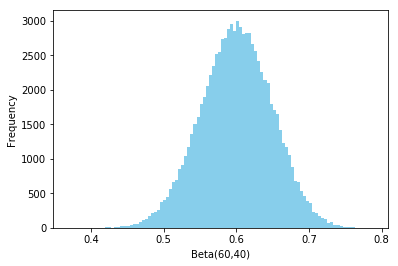

In [29]:
ax = sns.distplot(beta_data,
                kde=False,
                bins=100,
                color='skyblue',
                hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Beta(60,40)', ylabel='Frequency')

### Bernoulli / Binomial

Chance a customer will call right now. For every second in a day run the trial once.

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial')]

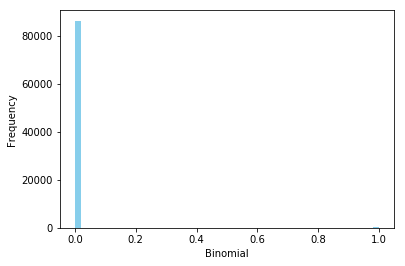

In [30]:
# Check if call Yes / No once per second for one day.
binom_data = np.random.binomial(1, 0.002, size=86400 )
ax = sns.distplot(binom_data,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial')]

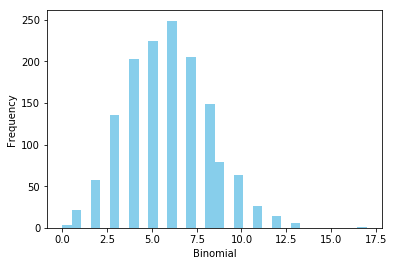

In [31]:
# Check if call Yes / No 60 times per minute for a day.
binom_data2 = np.random.binomial(60, 0.1, size=1440 )
ax = sns.distplot(binom_data2,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

### Poisson 

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Frequency'), Text(0.5,0,'Poisson')]

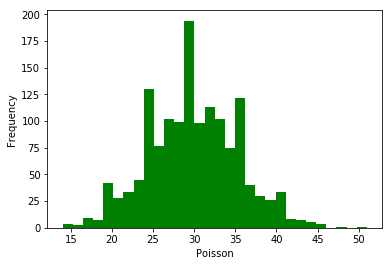

In [32]:
poisson_data = np.random.poisson(30, 1440)
ax = sns.distplot(poisson_data,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

### Exponential 

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


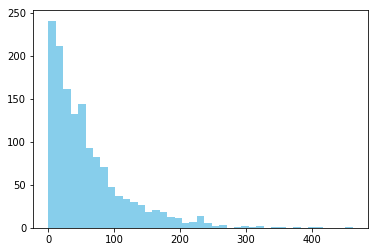

In [33]:
# Expected call every 60 mintues over a day.
expo_data = np.random.exponential(scale=60, size=1440)
ax = sns.distplot(expo_data,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 60,'alpha':1})

In [34]:
expo_data.std()

59.95458820969665

## Seeds and Pseudorandom Numbers

### Introduction to Seeds

All Pseudorandom number generator require a seed to work. The basic explaination of the use for a seed is that using a seed will generate the same set of random numbers each time you feed it into a Pseudorandom Number Generator. 

For example, if I don't use a seed I will get a different number each time I generate a number using the rand function.

In [42]:
print("Random number 1 without seed:", np.random.rand())

print("Random number 2 without seed:", np.random.rand())

print("Random number 3 without seed:", np.random.rand())

Random number 1 without seed: 0.5455378118771981
Random number 2 without seed: 0.0804403060002521
Random number 3 without seed: 0.7786654288473485


However, if I set a "seed" I will get back the same random number each time.

In [46]:
np.random.seed(seed=1)
print("Random number 1 with seed:", np.random.rand())
np.random.seed(seed=1)
print("Random number 2 with seed:", np.random.rand())
np.random.seed(seed=1)
print("Random number 3 with seed:", np.random.rand())

Random number 1 with seed: 0.417022004702574
Random number 2 with seed: 0.417022004702574
Random number 3 with seed: 0.417022004702574


**Should you always use a seed in np.random?**

In the above example I have entered a number to generate the seed. If I had left the arguement blank or entered "None" as the arguement Numpy would have used the best available seed on my operating system. In Windows, this is the CryptGenRandom() function which generates a random seed using data from a combination inputs like of mouse click and keyboard key hits times, the user process ID, the system clock, memory status and more. This then is combined to use as seed for further randomisation. Therefore, in most cases, it is better to leave the seed arguement blank to generate a random number unless you want to make it repeatable or you have found a better source of seeds.

**Where can I get a truely random seed?**

There are two types of random number generator:
1. True Random Number generators, and 
2. Psuedo Random Number generators

The Numpy.Random package is a Pseudo random number generator. Pseudo Random number generators differ from True random number generators in that the numbers are not really random. They are based on algorithm (the Mersenne Twister in Python's and most other languages case) that selects numbers that seem random, but in reality can be reproduced or predicted if you manage to see what is happening "under the hood". This is what makes pseudo random number unreliable for security purposes such as encryption or generating passwords. True random number generators are impossible to predict (or close enough). One example of a True Random Number generator would be rolling a dice and seeing what you get. This would be pretty labourious for commercial application, so people have created several methods for getting true random numbers such as RANDOM.ORG which uses atmospheric noise or others that use quantum phenoena. As true random number generators can only produce a limited number of random numbers per second, they are often used to create the seed for a faster pseudorandom number generator. Python does have a seperate package for generating cryptographically strong random numbers, which is called Secrets.

## Algorithms

Periods: How many numbers a PRNG can generate before it starts repeating itself.

Distributions: How random do you want the number to be. You can make them clump around different areas as we saw above

Algorithms:

1. **Middle Square method:** 
Square the middle number and on and on.

2.  **Linear Congruential Generator:** Used in alot. Super simple to use. Flaws in distribution. To run you need
    * Seed which is provided by the user
    * Multiplier (a)
    * Increment (c)
    * Modulus (m) 
Seed = (a x seed + c) % m

3. **Mersenne Twister:**
As I mentioned above this is the algorithm used by Python and is relatively speaking pretty good. It can pass all of the Diehard tests for measuring the quality of random number generators but is not good enough for generating cryptographically strong random numbers. 
